# 深度反复神经网络

:label:`sec_deep_rnn`

到目前为止，我们只讨论了单向隐藏层的 rnN。在其中，潜在变量和观测值相互作用的特定功能形式是相当任意的。只要我们有足够的灵活性来模拟不同类型的互动，这不是一个大问题。但是，只要单一层，这可能是相当具有挑战性的。对于线性模型，我们通过添加更多层来解决此问题。在 rnN 中，这有点棘手，因为我们首先需要决定如何以及在哪里添加额外的非线性。

事实上，我们可以将多层 RNN 堆叠在彼此之上。由于几个简单层的组合，这导致了灵活的机制。特别是，数据在堆栈的不同级别可能是相关的。例如，我们可能希望保持有关金融市场状况（熊市或牛市）的高级数据，而在较低水平上，我们只记录短期时间动态。

除了上述所有抽象讨论之外，通过查看 :numref:`fig_deep_rnn` 来理解我们感兴趣的模型系列可能是最容易的。它描述了一个带有 $L$ 个隐藏图层的深度 RNN。每个隐藏状态都会连续传递到当前图层的下一个时间步长和下一个图层的当前时间步长。

![Architecture of a deep RNN.](../img/deep-rnn.svg)
:label:`fig_deep_rnn`

## 功能依赖

我们可以在 :numref:`fig_deep_rnn` 中描述的 $L$ 隐藏层的深层架构中正式化功能依赖关系。我们以下讨论主要集中在香草 RNN 模型上，但它也适用于其他序列模型。

假设我们在时间步骤 $t$ 时有一个小批量输入 $\mathbf{X}_t \in \mathbb{R}^{n \times d}$（示例数：$n$，每个示例中的输入数量：$d$）。同时，让 $l^\mathrm{th}$ 隐藏层 ($l=1,\ldots,L$) 的隐藏状态为 $\mathbf{H}_t^{(l)}  \in \mathbb{R}^{n \times h}$（隐藏单位数：$h$），输出层变量为 $\mathbf{O}_t \in \mathbb{R}^{n \times q}$（输出数量：$q$）。设置 $\mathbf{H}_t^{(0)} = \mathbf{X}_t$，使用激活功能 $\phi_l$ 的 $l^\mathrm{th}$ 隐藏层的隐藏状态表示如下：

$$\mathbf{H}_t^{(l)} = \phi_l(\mathbf{H}_t^{(l-1)} \mathbf{W}_{xh}^{(l)} + \mathbf{H}_{t-1}^{(l)} \mathbf{W}_{hh}^{(l)}  + \mathbf{b}_h^{(l)}),$$
:eqlabel:`eq_deep_rnn_H`

其中权重 $\mathbf{W}_{xh}^{(l)} \in \mathbb{R}^{h \times h}$ 和 $\mathbf{W}_{hh}^{(l)} \in \mathbb{R}^{h \times h}$ 以及偏置 $\mathbf{b}_h^{(l)} \in \mathbb{R}^{1 \times h}$ 是 $l^\mathrm{th}$ 隐藏层的模型参数。

最后，输出图层的计算仅基于最终 $L^\mathrm{th}$ 隐藏层的隐藏状态：

$$\mathbf{O}_t = \mathbf{H}_t^{(L)} \mathbf{W}_{hq} + \mathbf{b}_q,$$

其中权重 $\mathbf{W}_{hq} \in \mathbb{R}^{h \times q}$ 和偏置 $\mathbf{b}_q \in \mathbb{R}^{1 \times q}$ 是输出层的模型参数。

与 MLP 一样，隐藏层的数量 $L$ 和隐藏单位的数量 $h$ 都是超参数。换句话说，我们可以调整或指定它们。此外，通过将 :eqref:`eq_deep_rnn_H` 中的隐藏状态计算替换为 GRU 或 LSTM 的隐藏状态计算，我们可以轻松获得深度门控 RNN。

## 简明的实施

幸运的是，实施多层 RNN 所需的许多物流细节都可以在高级 API 中随时获得。为了简单起见，我们只使用这些内置功能来说明实现。让我们以 LSTM 模型为例。该代码与我们之前在 :numref:`sec_lstm` 中使用的代码非常相似。事实上，唯一的区别是我们明确指定图层的数量，而不是选择单个图层的默认值。像往常一样，我们首先加载数据集。


In [1]:
from mxnet import npx
from mxnet.gluon import rnn
from d2l import mxnet as d2l

npx.set_np()

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

选择超参数之类的架构决策与 :numref:`sec_lstm` 的架构决策非常相似。我们选择的输入和输出数量与我们有不同的令牌相同，即 `vocab_size`。隐藏单位的数量仍然是 256 个。唯一的区别是，我们现在通过指定值 `num_layers` 来选择一个不平凡的隐藏图层。


In [2]:
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
device = d2l.try_gpu()
lstm_layer = rnn.LSTM(num_hiddens, num_layers)
model = d2l.RNNModel(lstm_layer, len(vocab))

## 训练和预测

从现在起，我们使用 LSTM 模型实例化两层，这个相当复杂的体系结构大大减慢了训练速度。


perplexity 1.0, 125883.8 tokens/sec on gpu(0)
time traveller for so it will be convenient to speak of himwas e


travelleryou can show black is white by argument said filby


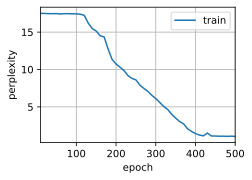

In [3]:
num_epochs, lr = 500, 2
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

## 摘要

* 在深度 RNN 中，隐藏状态信息将传递给当前图层的下一个时间步长和下一层的当前时间步长。
* 有许多不同风格的深 RNN，例如 lstM、gRU 或香草 RNN。方便地，这些模型都作为深度学习框架的高级 API 的一部分提供。
* 模型的初始化需要小心。总体而言，深度 RNN 需要大量的工作（例如学习率和裁剪）才能确保适当的融合。

## 练习

1. 尝试使用我们在 :numref:`sec_rnn_scratch` 中讨论的单层实现从头开始实施双层 RNN。
2. 用 GRU 替换 LSTM，然后比较准确性和训练速度。
3. 增加培训数据以包括多本书。在困惑程度上你能进行多低？
4. 在建模文本时，您是否想合并不同作者的来源？为什么这是个好主意？可能会出什么问题？


[Discussions](https://discuss.d2l.ai/t/340)
